### POSCAR.nnlistをDataFrameとして読み込む

In [1]:
from package_file_conversion.nnlist2df import nnlist2df

In [4]:
df_nnlist = nnlist2df(nnlist_path='sample_test_files/POSCAR.nnlist')

In [8]:
df_nnlist.head(4)

,central_atom_id,neighboring_atom_id,rel_distance,rel_x,rel_y,rel_z,unitcell_x,unitcell_y,unitcell_z,central_atom_symbol,neighboring_atom_symbol
0,1,1,0.000000,0.000000,0.000000,0.000000,0,0,0,C,C
1,1,9,1.282630,0.000000,1.281885,-0.043713,0,0,0,C,O
2,1,13,1.289100,1.112990,-0.650283,0.012857,0,0,0,C,O
3,1,16,1.289100,-1.112990,-0.650283,0.012857,0,0,0,C,O


### 原子Cと原子Oの距離を抽出する

In [20]:
df_nnlist.columns

Index(['central_atom_id', 'neighboring_atom_id', 'rel_distance', 'rel_x',
       'rel_y', 'rel_z', 'unitcell_x', 'unitcell_y', 'unitcell_z',
       'central_atom_symbol', 'neighboring_atom_symbol'],
      dtype='object')

#### central_atom_symbolカラムが'C', neighboring_atom_symbolカラムが'O'のレコードのみ抽出

In [25]:
df_nnlist_C_O = df_nnlist[df_nnlist.apply(lambda row: (row['central_atom_symbol'] == 'C') and (row['neighboring_atom_symbol'] == 'O'), axis=1)]
df_nnlist_C_O

,central_atom_id,neighboring_atom_id,rel_distance,rel_x,rel_y,rel_z,unitcell_x,unitcell_y,unitcell_z,central_atom_symbol,neighboring_atom_symbol
1,1,9,1.282630,0.000000,1.281885,-0.043713,0,0,0,C,O
2,1,13,1.289100,1.112990,-0.650283,0.012857,0,0,0,C,O
3,1,16,1.289100,-1.112990,-0.650283,0.012857,0,0,0,C,O
5,2,10,1.282630,0.000000,-1.281885,-0.043713,0,0,0,C,O
6,2,14,1.289100,-1.112990,0.650283,0.012857,0,0,0,C,O
7,2,17,1.289100,1.112990,0.650283,0.012857,0,0,0,C,O
9,3,11,1.282630,0.000000,-1.281885,0.043713,0,0,0,C,O
10,3,15,1.289100,-1.112990,0.650283,-0.012857,0,0,0,C,O
11,3,19,1.289100,1.112990,0.650283,-0.012857,0,0,0,C,O
13,4,12,1.282630,0.000000,1.281885,0.043713,0,0,0,C,O


### df_nnlist_C_Oから，rel_distanceカラムを抽出し，listに格納．

In [83]:
df_nnlist_C_O['rel_distance']

1    1.282630
2    1.289100
3    1.289100
5    1.282630
6    1.289100
7    1.289100
9    1.282630
10   1.289100
11   1.289100
13   1.282630
14   1.289100
15   1.289100
Name: rel_distance, dtype: float64

In [64]:
CO_bond_dist_list = df_nnlist_C_O['rel_distance'].tolist()

In [65]:
CO_bond_dist_list

[1.28263,
 1.2891,
 1.2891,
 1.28263,
 1.2891,
 1.2891,
 1.28263,
 1.2891,
 1.2891,
 1.28263,
 1.2891,
 1.2891]

### ヒストグラムを描く

In [67]:
list_2 = CO_bond_dist_list

In [68]:
import numpy as np

In [71]:
a = np.array(CO_bond_dist_list)

In [75]:
b = np.append(a, list_2)

In [78]:
import seaborn as sns

<Axes: ylabel='Count'>

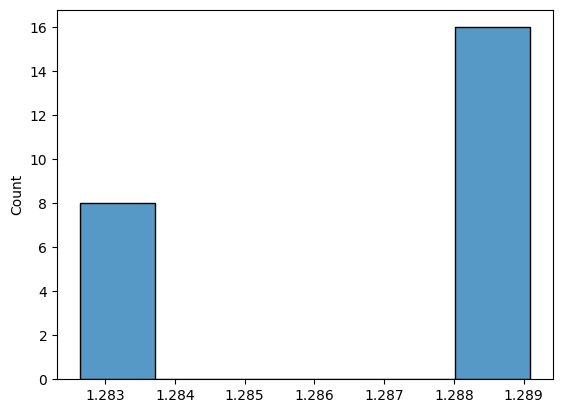

In [79]:
sns.histplot(b)

#### listとndarrayの容量比較

In [86]:
import sys

array([1.28263, 1.2891 , 1.2891 , 1.28263, 1.2891 , 1.2891 , 1.28263,
       1.2891 , 1.2891 , 1.28263, 1.2891 , 1.2891 , 1.28263, 1.2891 ,
       1.2891 , 1.28263, 1.2891 , 1.2891 , 1.28263, 1.2891 , 1.2891 ,
       1.28263, 1.2891 , 1.2891 ])

In [89]:
# ndarray
sys.getsizeof(b)

304

In [91]:
# list
sys.getsizeof(b.tolist())

248

### listの方がndarrayよりメモリ使用量が小さいことが分かった．

In [102]:
!pwd

/mnt/ssd_elecom_black_c2c_480G/scripts/get_CO_bond_dist
